In [6]:
import wave
import pyaudio
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [7]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
SAMPLE_RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "audio.wav"

In [8]:
pa = pyaudio.PyAudio()

stream = pa.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=SAMPLE_RATE,
    input=True,
    frames_per_buffer=CHUNK # buffer
)

print("* recording")

frames = []

for i in range(0, int(SAMPLE_RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
pa.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(pa.get_sample_size(FORMAT))
wf.setframerate(SAMPLE_RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


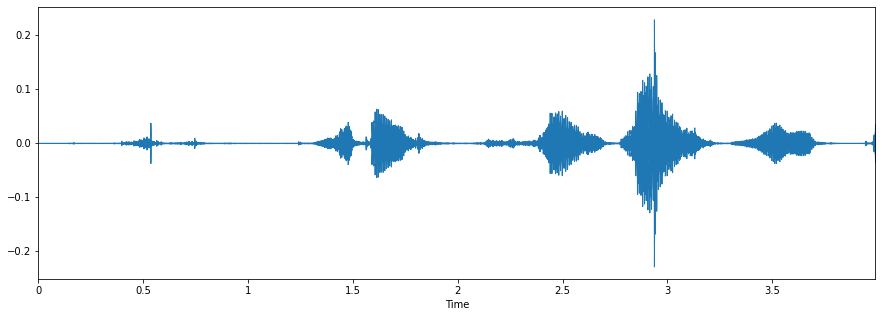

In [9]:
data, sample_rate = librosa.load(WAVE_OUTPUT_FILENAME)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sample_rate)